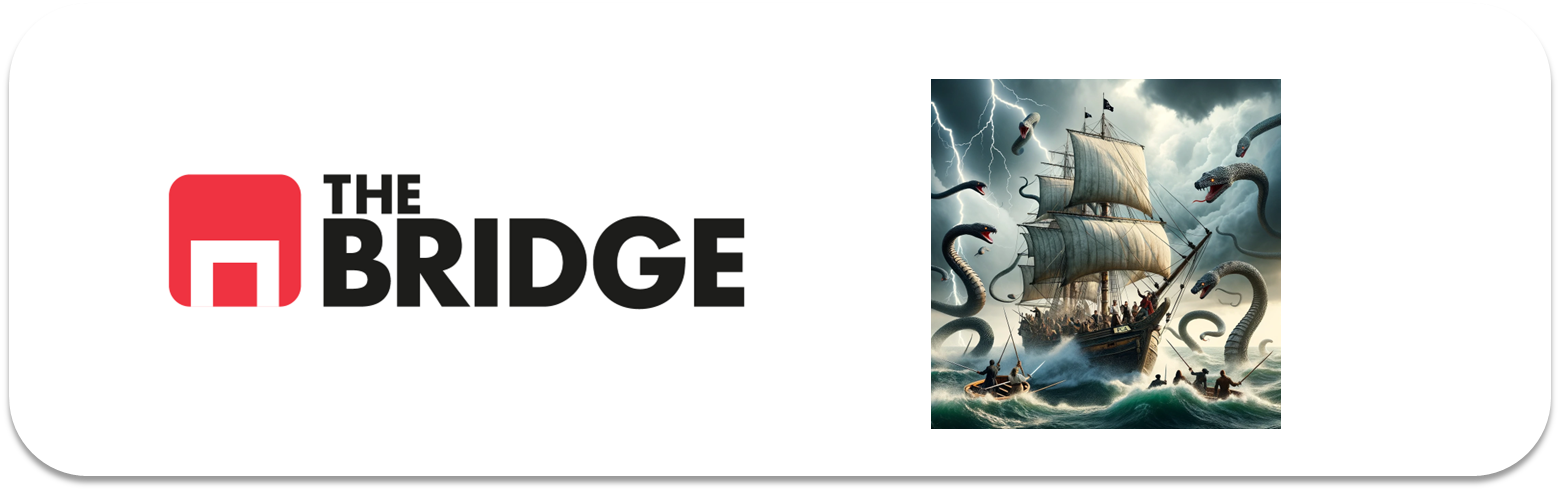

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, XGBRegressor

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [2]:
df = pd.read_csv("./data/credit_npo.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
df.dropna(inplace=True)

In [5]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


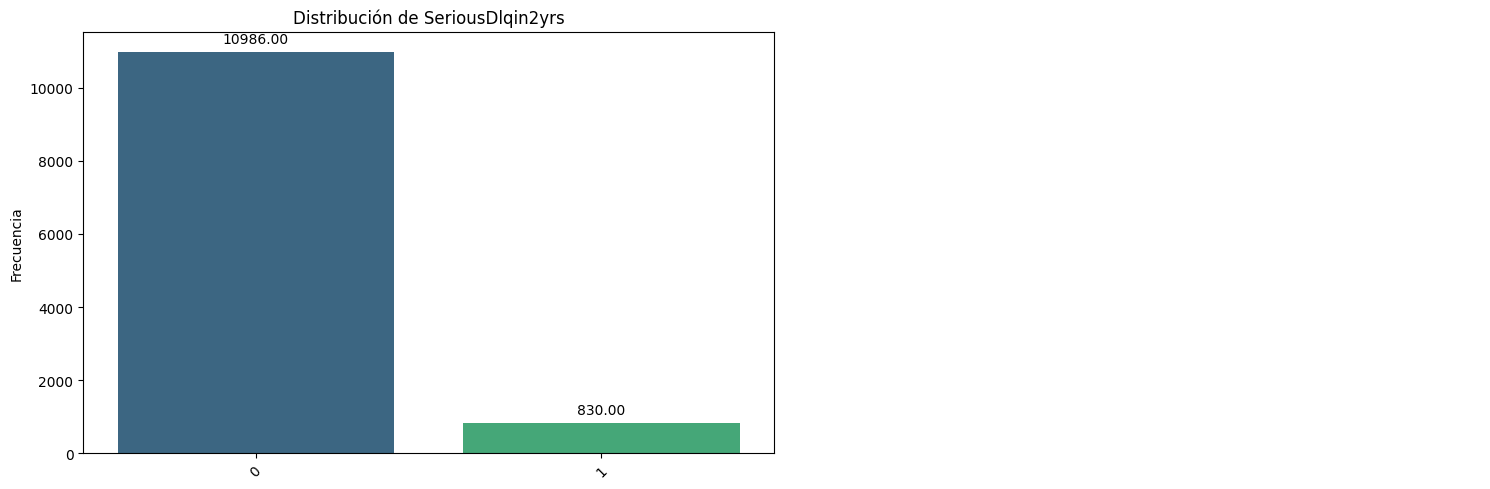

In [6]:
target = "SeriousDlqin2yrs"

bt.pinta_distribucion_categoricas(df,[target], mostrar_valores= True, relativa=False)

In [7]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

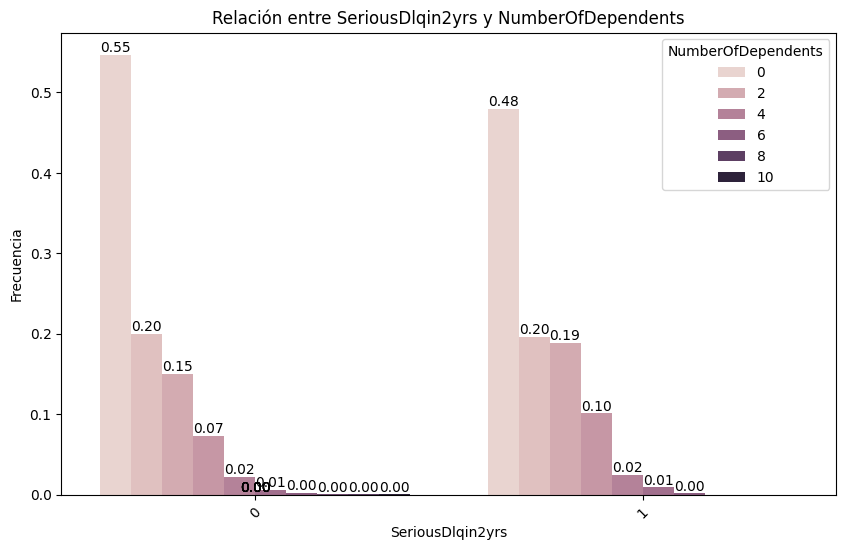

In [8]:
bt.plot_categorical_relationship_fin(train_set, target, 'NumberOfDependents', show_values= True, relative_freq= True)

NumbersOfDependents la excluyo

In [ ]:
# numberOf = [col for col in train_set if col.startswith("NumberOfTime")]
# for col in numberOf:
#     print(f"Para pagadores, value_counts de {col}")
#     print(train_set[train_set[target]== 0][col].value_counts(True))
#     print(f"Para impagadores")
#     print(train_set[train_set[target]==1][col].value_counts(True))
#     print("****")

In [10]:
#df['NoT_cat'] = df['NumberOfTime30-59DaysPastDueNotWorse'].apply(lambda x: '0' if x == 0 else ('1' if x == 1 else 'más de 1'))

In [11]:
#df['NoT_cat'].value_counts()

In [ ]:
numberOf = [col for col in train_set if col.startswith("NumberOfTime")]
for col in numberOf:
    df[f'{col}_categorizado'] = df[col].apply(lambda x: '0' if x == 0 else ('1' if x == 1 else 'más de 1'))

In [13]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,NumberOfTime30-59DaysPastDueNotWorse_categorizado,NumberOfTimes90DaysLate_categorizado,NumberOfTime60-89DaysPastDueNotWorse_categorizado
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0,0,1,0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0,0,0,0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0,0,0,0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0,0,0,0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0,0,0,0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0,0,0,0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0,0,0,0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0,0,0,0


In [14]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents',
       'NumberOfTime30-59DaysPastDueNotWorse_categorizado',
       'NumberOfTimes90DaysLate_categorizado',
       'NumberOfTime60-89DaysPastDueNotWorse_categorizado'],
      dtype='object')

In [15]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) 
    # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [16]:
card_tipo(df)

,Card,%_Card,Tipo,tipo_sugerido
SeriousDlqin2yrs,2,0.016926,int64,Binaria
RevolvingUtilizationOfUnsecuredLines,10314,87.288422,float64,Numerica continua
age,78,0.660122,int64,Numerica discreta
NumberOfTime30-59DaysPastDueNotWorse,10,0.084631,int64,Numerica discreta
DebtRatio,11472,97.088693,float64,Numerica continua
MonthlyIncome,4167,35.265741,float64,Numerica continua
NumberOfOpenCreditLinesAndLoans,43,0.363913,int64,Numerica discreta
NumberOfTimes90DaysLate,13,0.11002,int64,Numerica discreta
NumberRealEstateLoansOrLines,16,0.13541,int64,Numerica discreta
NumberOfTime60-89DaysPastDueNotWorse,8,0.067705,int64,Categorica


In [ ]:
cat_col = ['NumberOfTime30-59DaysPastDueNotWorse_categorizado',
       'NumberOfTimes90DaysLate_categorizado',
       'NumberOfTime60-89DaysPastDueNotWorse_categorizado']

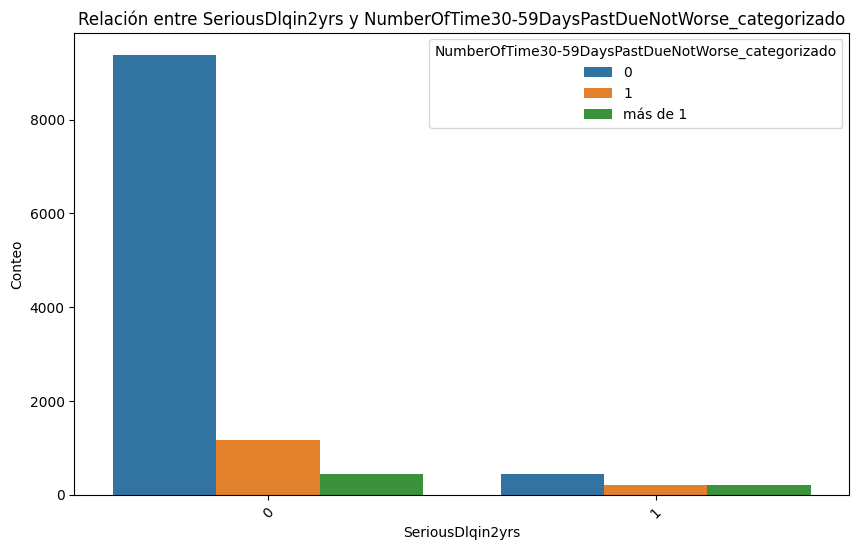

In [31]:
bt.plot_categorical_relationship_fin(df,target, 'NumberOfTime30-59DaysPastDueNotWorse_categorizado')

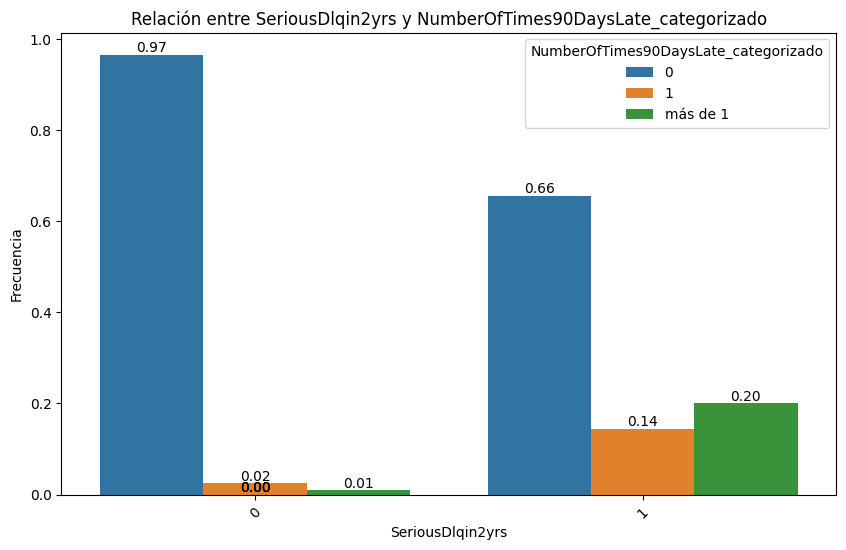

In [33]:
bt.plot_categorical_relationship_fin(df,target, 'NumberOfTimes90DaysLate_categorizado',show_values= True, relative_freq= True)

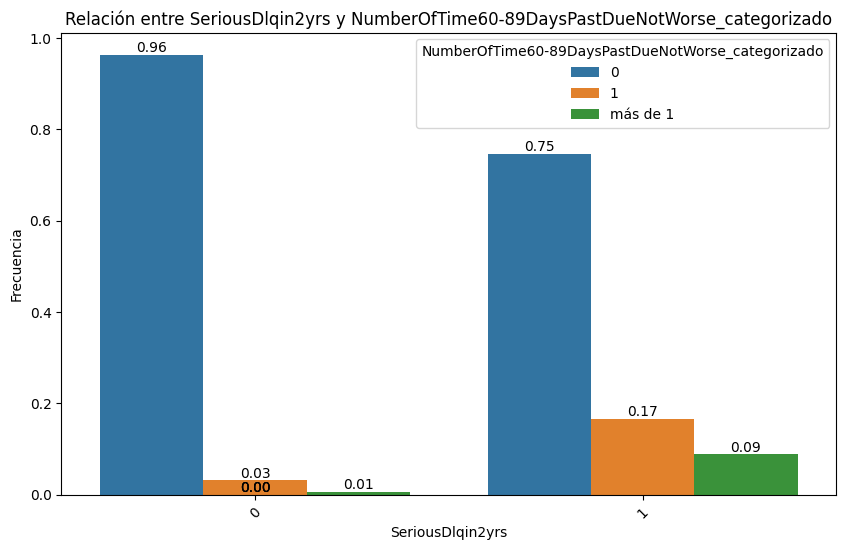

In [32]:
bt.plot_categorical_relationship_fin(df,target,'NumberOfTime60-89DaysPastDueNotWorse_categorizado',show_values= True, relative_freq= True)

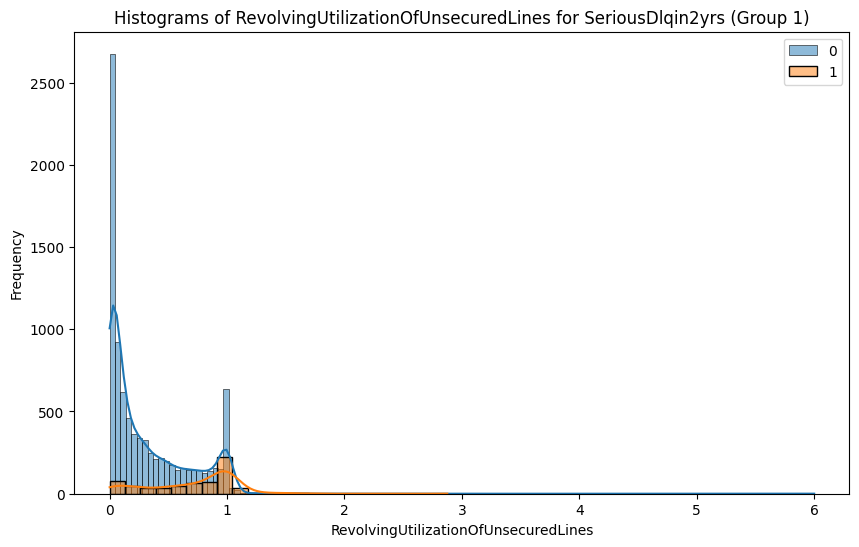

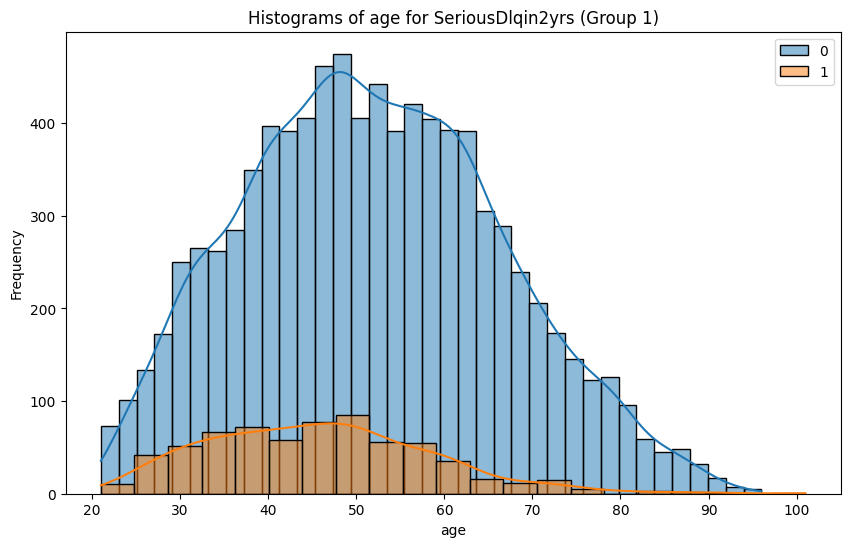

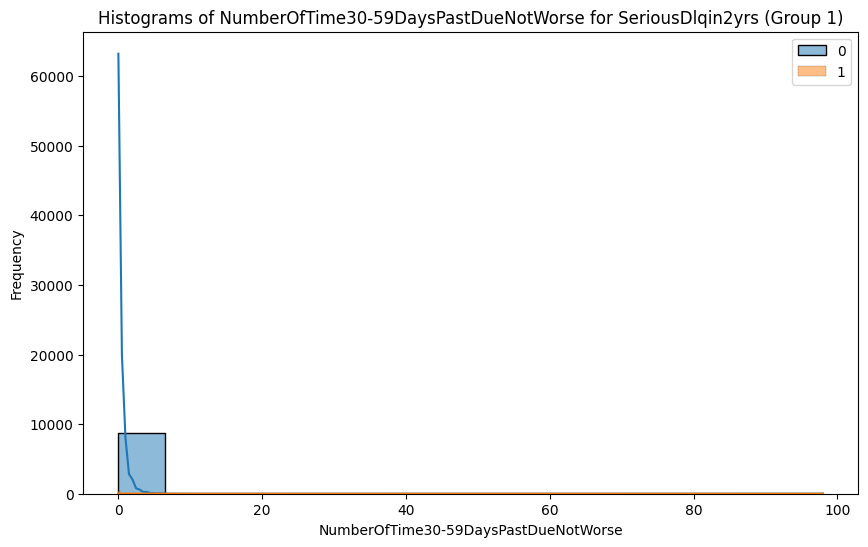

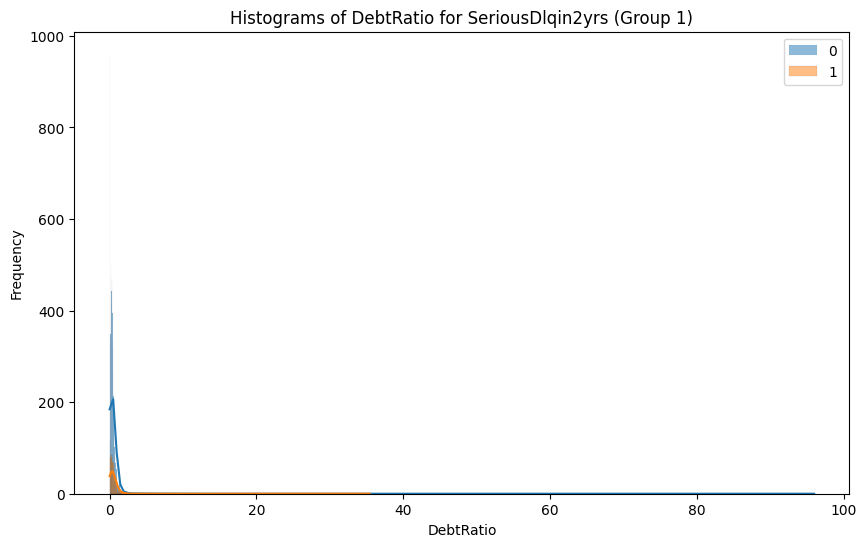

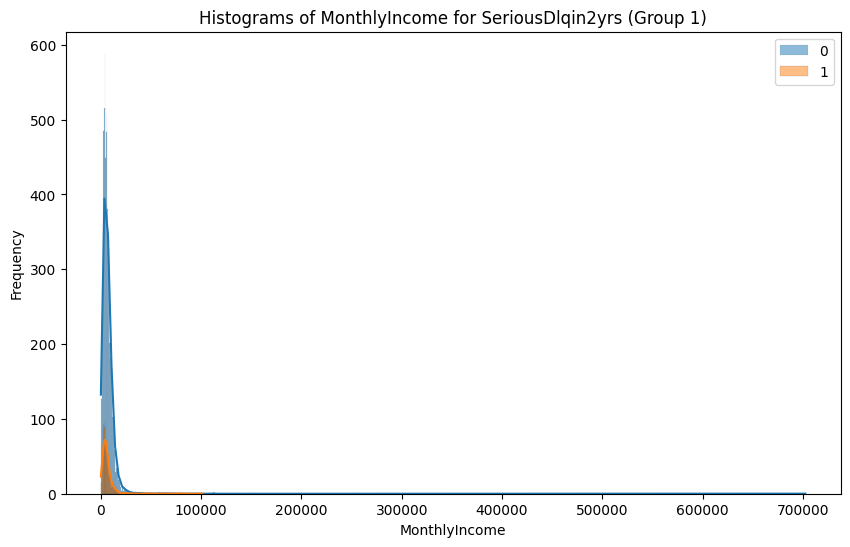

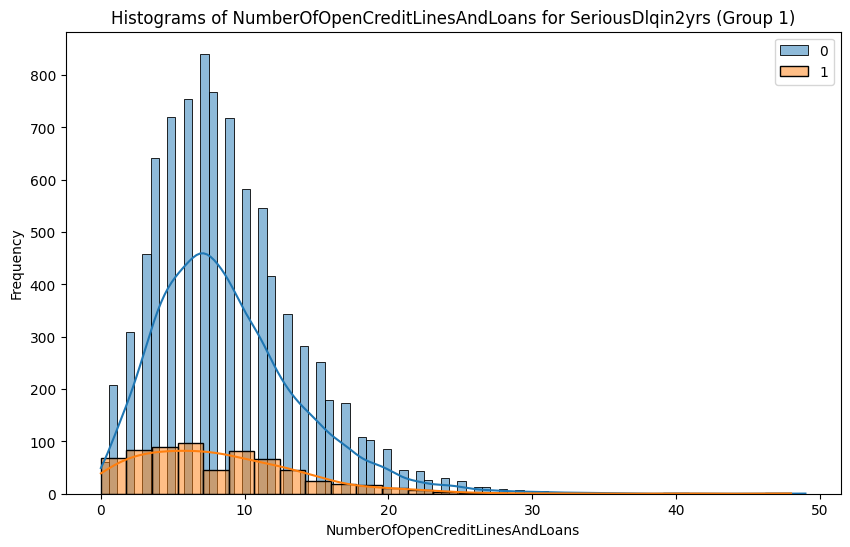

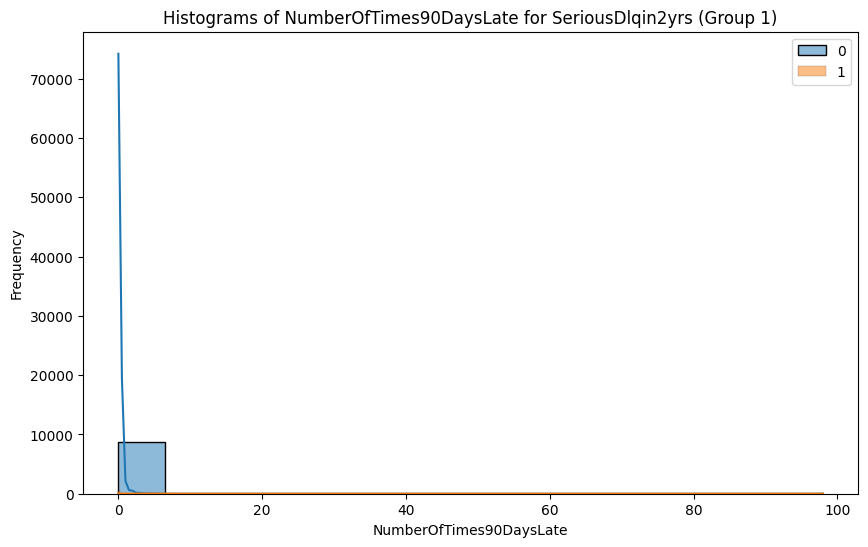

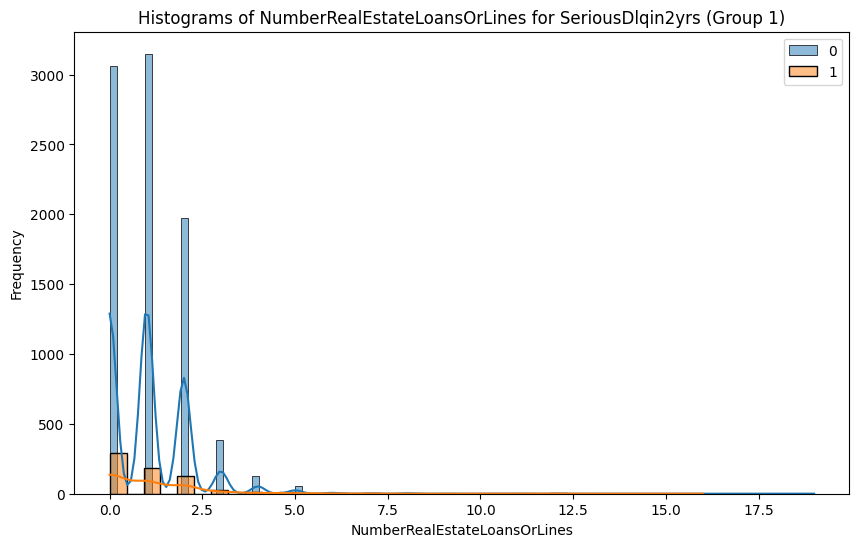

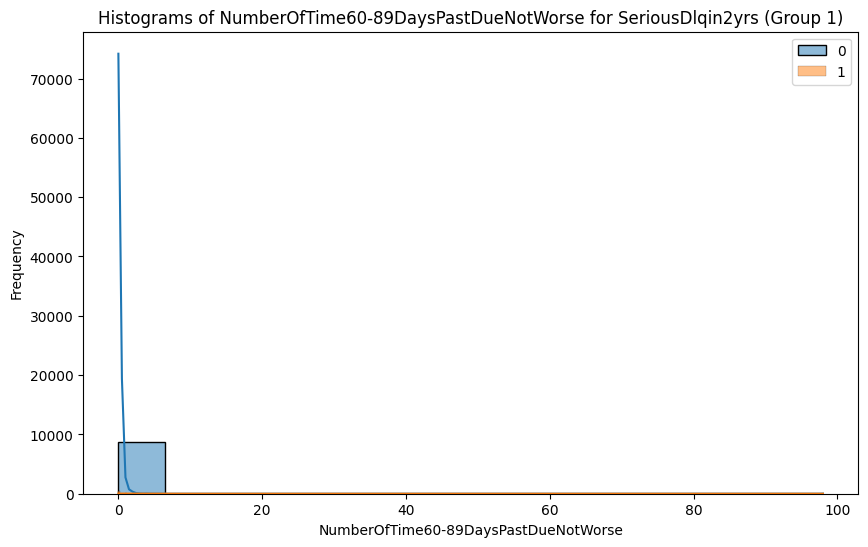

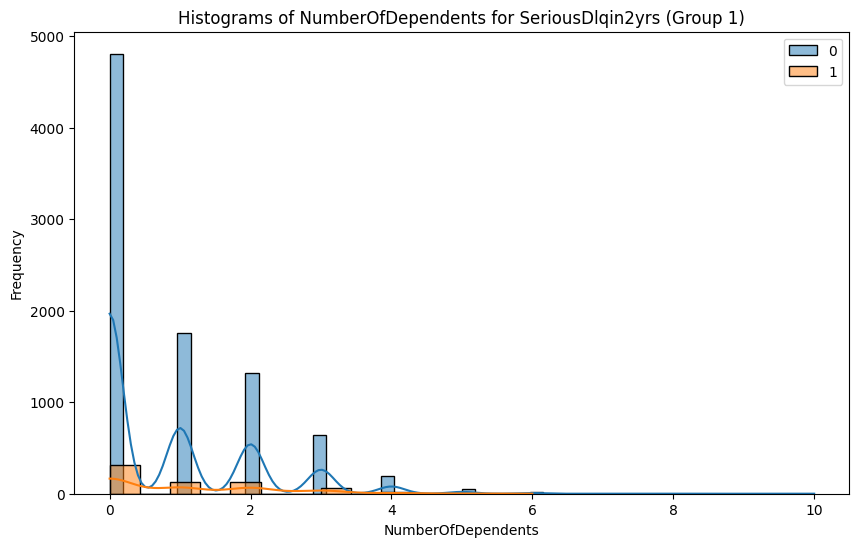

In [34]:
features = [col for col in train_set.columns if col != target]

for col in features:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

In [36]:
import numpy as np

corr= df.corr(numeric_only=True)
serie_corr = np.abs(corr[target])
serie_corr.sort_values(ascending = False)

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.280350
NumberOfTimes90DaysLate                 0.132191
NumberOfTime30-59DaysPastDueNotWorse    0.131163
age                                     0.106076
NumberOfTime60-89DaysPastDueNotWorse    0.101231
NumberOfDependents                      0.043825
NumberOfOpenCreditLinesAndLoans         0.029574
MonthlyIncome                           0.022199
DebtRatio                               0.001666
NumberRealEstateLoansOrLines            0.001321
Name: SeriousDlqin2yrs, dtype: float64

In [37]:
r_minimo = 0.10
features_num_sel = serie_corr[serie_corr >= r_minimo].index.to_list()
features_num_sel

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [40]:
#aplicando colinealidad
criterio_col = 0.65
excluidas = []
for col in features_num_sel:
    print(f"Voy a comprobar la colinealidad con {col}")
    if col not in excluidas:
        for col_2,valor_corr in corr[col].items():
            print(f"Comprobando con {col_2}")
            if col != col_2 and col_2 in features_num_sel:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"Correlo al {valor_corr}, por eso excluyo a {col_2}")
                    excluidas.append(col_2)
                else:
                    print(f"Conmigo no tiene problema, dejo a {col_2} tranquila")
            elif col == col_2:
                print("soy yo misma, no me excluyo")
            else:
                print("No estaba ya en la lista original, no hago nada")
excluidas = list(set(excluidas))

Voy a comprobar la colinealidad con SeriousDlqin2yrs
Comprobando con SeriousDlqin2yrs
soy yo misma, no me excluyo
Comprobando con RevolvingUtilizationOfUnsecuredLines
Conmigo no tiene problema, dejo a RevolvingUtilizationOfUnsecuredLines tranquila
Comprobando con age
Conmigo no tiene problema, dejo a age tranquila
Comprobando con NumberOfTime30-59DaysPastDueNotWorse
Conmigo no tiene problema, dejo a NumberOfTime30-59DaysPastDueNotWorse tranquila
Comprobando con DebtRatio
No estaba ya en la lista original, no hago nada
Comprobando con MonthlyIncome
No estaba ya en la lista original, no hago nada
Comprobando con NumberOfOpenCreditLinesAndLoans
No estaba ya en la lista original, no hago nada
Comprobando con NumberOfTimes90DaysLate
Conmigo no tiene problema, dejo a NumberOfTimes90DaysLate tranquila
Comprobando con NumberRealEstateLoansOrLines
No estaba ya en la lista original, no hago nada
Comprobando con NumberOfTime60-89DaysPastDueNotWorse
Conmigo no tiene problema, dejo a NumberOfTime60

In [41]:
excluidas

['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']

In [ ]:
for excluida in excluidas:
    features_num_sel.remove(excluida)


ValueError: list.remove(x): x not in list

In [45]:
features_num_sel

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse']

<Axes: >

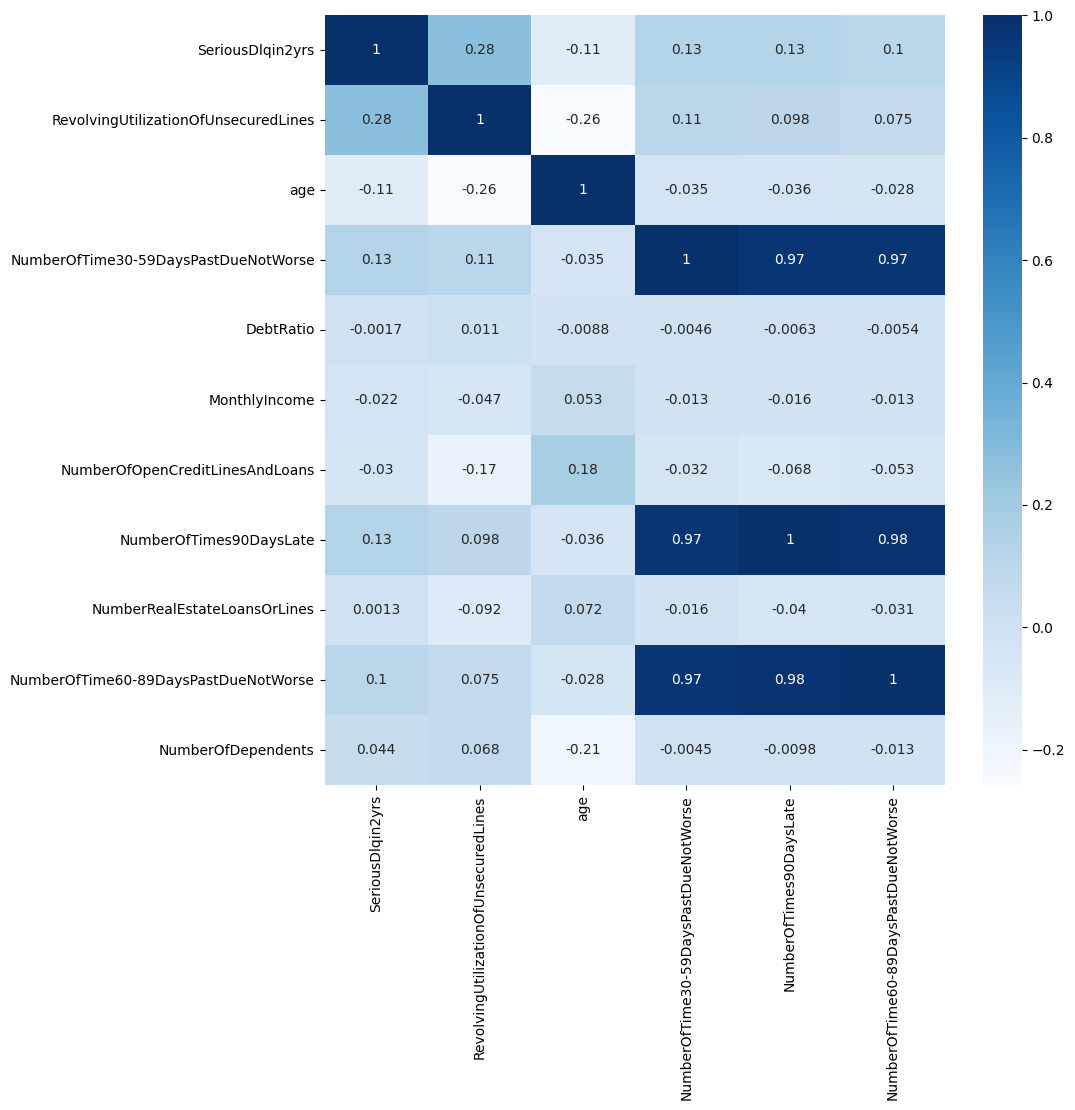

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(corr[features_num_sel], annot= True, cmap= "Blues")

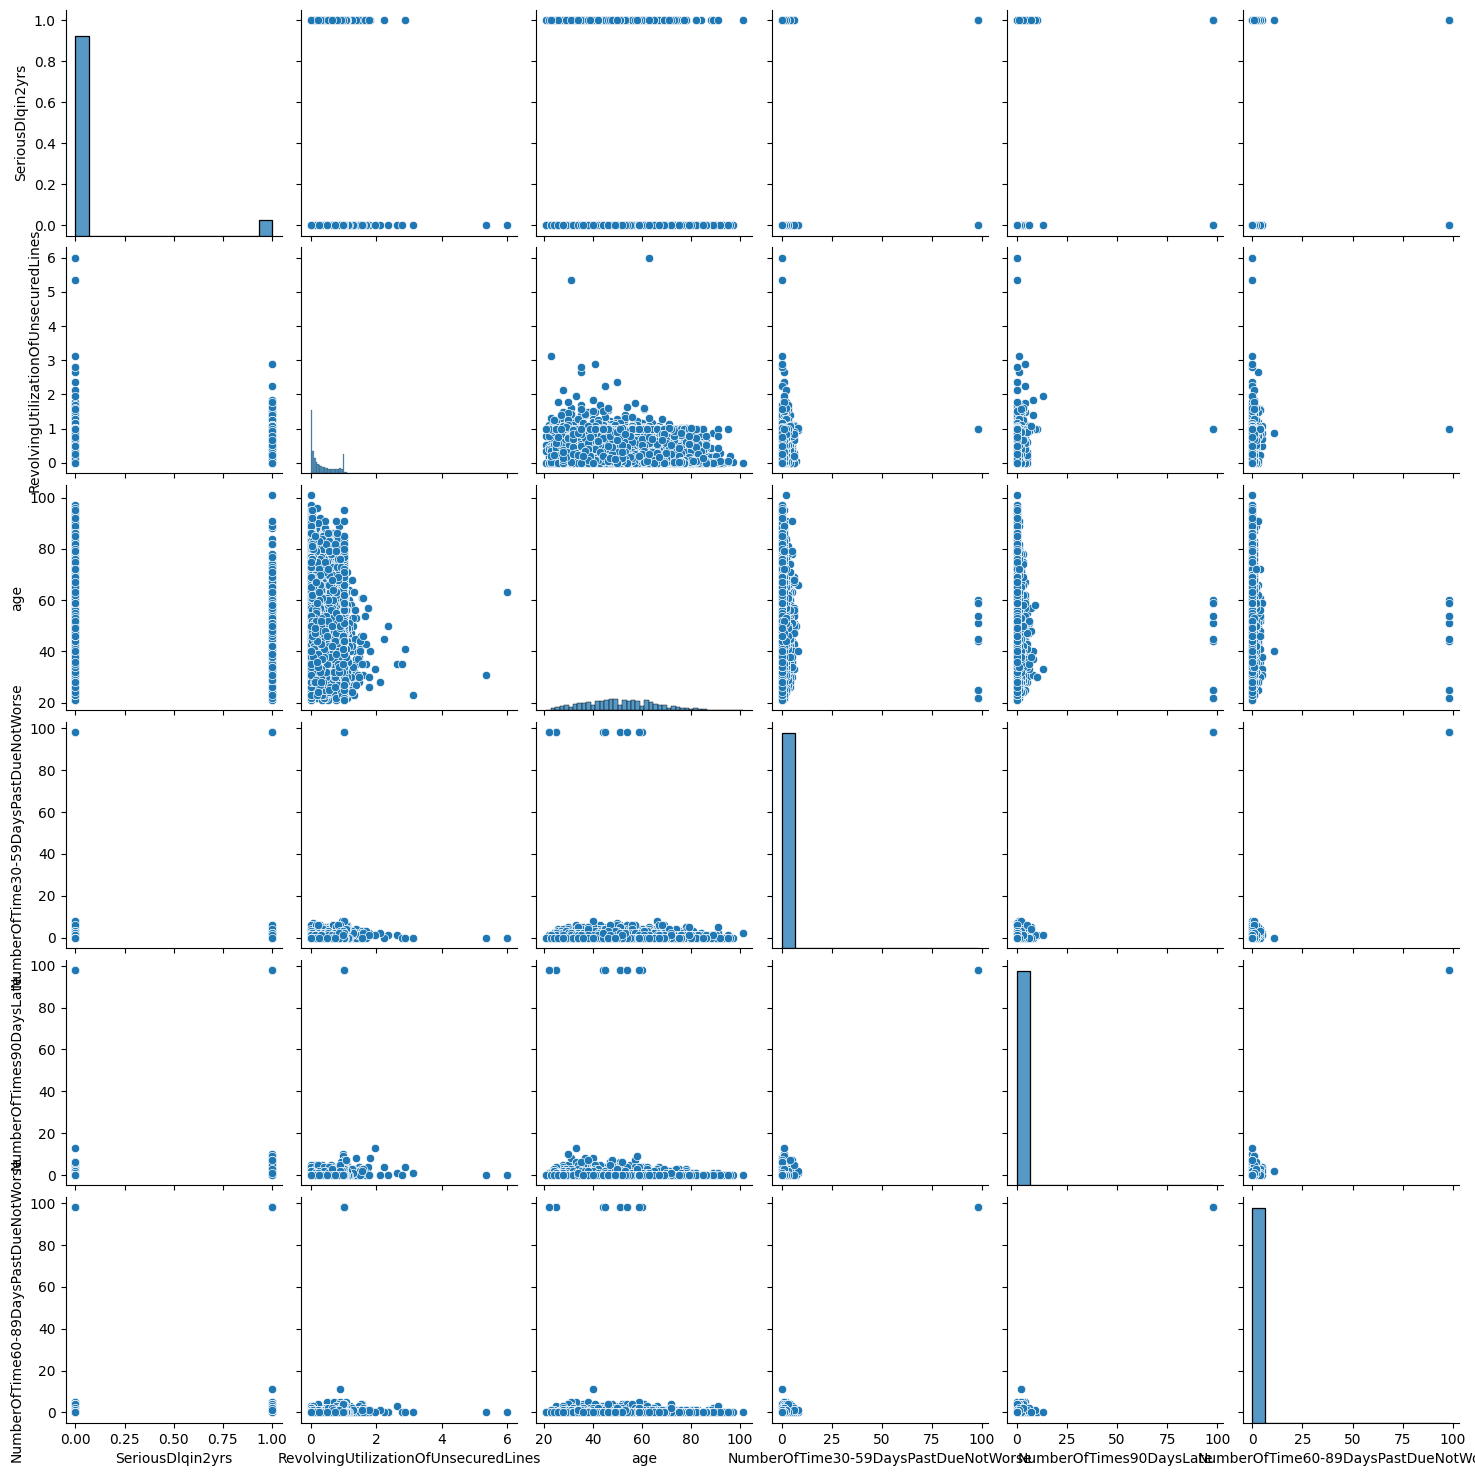

In [39]:
sns.pairplot(df[features_num_sel])

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.